# Initial results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import ast

from src.utils.movies_genres_utils import *

In [2]:
# Load preprocessed data
data_folder = 'data/MovieSummaries/'
df_metadata = pd.read_csv(data_folder + 'movies_metadata_cleaned.csv')

df_metadata

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Decade,Movie_continent,Grouped_genres,Plot_summary
0,0,975900,/m/03vyhn,Ghosts of Mars,2001.0,14010832.0,98.0,['English Language'],['United States of America'],"['Thriller', 'Science Fiction', 'Horror', 'Adv...",2000.0,North America,"['Supernatural', 'Horror', 'Thriller', 'War', ...",Set second half 22nd century film depicts Mars...
1,1,9363483,/m/0285_cd,White Of The Eye,1987.0,NaN,110.0,['English Language'],['United Kingdom'],"['Thriller', 'Erotic thriller', 'Psychological...",1980.0,Europe,['Thriller'],series murders rich young women throughout Ari...
2,2,261236,/m/01mrr1,A Woman in Flames,1983.0,NaN,106.0,['German Language'],['Germany'],['Drama'],1980.0,Europe,['Drama'],Eva upper class housewife becomes frustrated l...
3,3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002.0,NaN,86.0,['English Language'],['South Africa'],"['Family Film', 'Fantasy', 'Adventure', 'World...",2000.0,Africa,"['World', 'Fantasy', 'Family', 'Action/Adventu...",Every hundred years evil Morgana returns claim...
4,4,6631279,/m/0gffwj,Little city,1997.0,NaN,93.0,['English Language'],['United States of America'],"['Romantic comedy', 'Ensemble Film', 'Comedy-d...",1990.0,North America,"['Ensemble Film', 'Drama', 'Romance', 'Comedy']",Adam San Franciscobased artist works cab drive...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42199,42199,23851782,/m/06_vb43,The Ghost Train,1941.0,NaN,82.0,['English Language'],['United Kingdom'],"['Crime Fiction', 'Thriller', 'Comedy', 'Super...",1940.0,Europe,"['Supernatural', 'Thriller', 'Comedy', 'Fiction']",plot film opens Great Western express speeding...
42200,42200,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011.0,NaN,120.0,['English Language'],['United States of America'],['Drama'],2010.0,North America,['Drama'],Two former National Oceanic Atmospheric Admini...
42201,42201,34980460,/m/0g4pl34,Knuckle,2011.0,NaN,96.0,['English Language'],"['Ireland', 'United Kingdom']","['Biographical film', 'Drama', 'Documentary']",2010.0,Europe,"['Documentary', 'Drama', 'Biography']",plot film follows 12 years lives 3 Irish trave...
42202,42202,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992.0,NaN,150.0,['Japanese Language'],['Japan'],"['Science Fiction', 'Japanese Movies', 'Advent...",1990.0,Asia,"['Science Fiction', 'Japanese Movies', 'Short ...",story takes place year 2092The Super Dimension...


In [3]:
# Identify NaNs in the 'Grouped_genres' and remove them
problematic_values = []
for index, value in df_metadata['Grouped_genres'].items(): 
    if isinstance(value, str):
        try:
            ast.literal_eval(value)
        except (ValueError, SyntaxError):
            problematic_values.append((index, value))

            
df_metadata = df_metadata.drop([index for index, _ in problematic_values])

## Analysis of genres across the world throughout the decades

In [4]:
# Count of Genres per decade

# Expand the genres
df_metadata['Grouped_genres'] = df_metadata['Grouped_genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_expanded = df_metadata.explode('Grouped_genres')

# Group by 'Decade' and 'Movie_genres' and count occurrences
genre_distribution = df_expanded.groupby(['Decade', 'Grouped_genres']).size().reset_index(name="Count")

# Sort 'Decade' and 'Count' in descending order
genre_distribution = genre_distribution.sort_values(by=['Decade', 'Count'], ascending=[True, False])

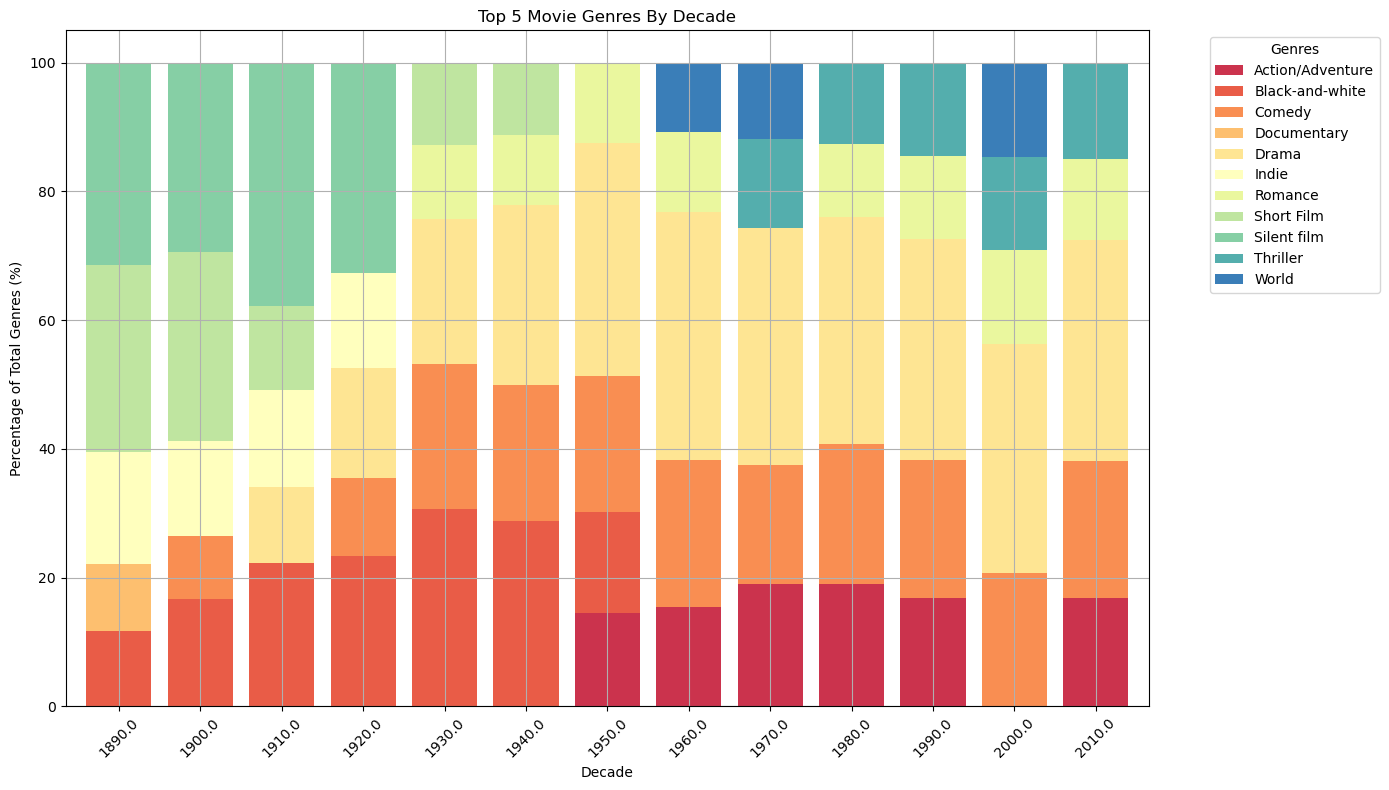

In [5]:
plot_top_genres(5, genre_distribution)

### Observations

We can observe the evolution of movie genres across the decades. Some genres, like Silent Films, disappeared from the top 5, while others emerged over time. Certain genres, such as Romance and Action/Adventure, were prominent in most decades but less so in others.

Drama and Comedy, however, were consistently dominant across most decades. 

The World genre stood out in three specific decades: the 1960s, 1970s, and 2000s. Its prominence in the first two may be attributed to the Cold War, while in the 2000s, it could be due to globalization.

We can also observe the emergence of Action/Adventure during 1960 and Thriller during 1970.

In [6]:
all_genre_distr = df_expanded.groupby(['Grouped_genres']).size().reset_index(name="Count")
all_genre_distr = all_genre_distr.sort_values(by=['Count'], ascending=False)

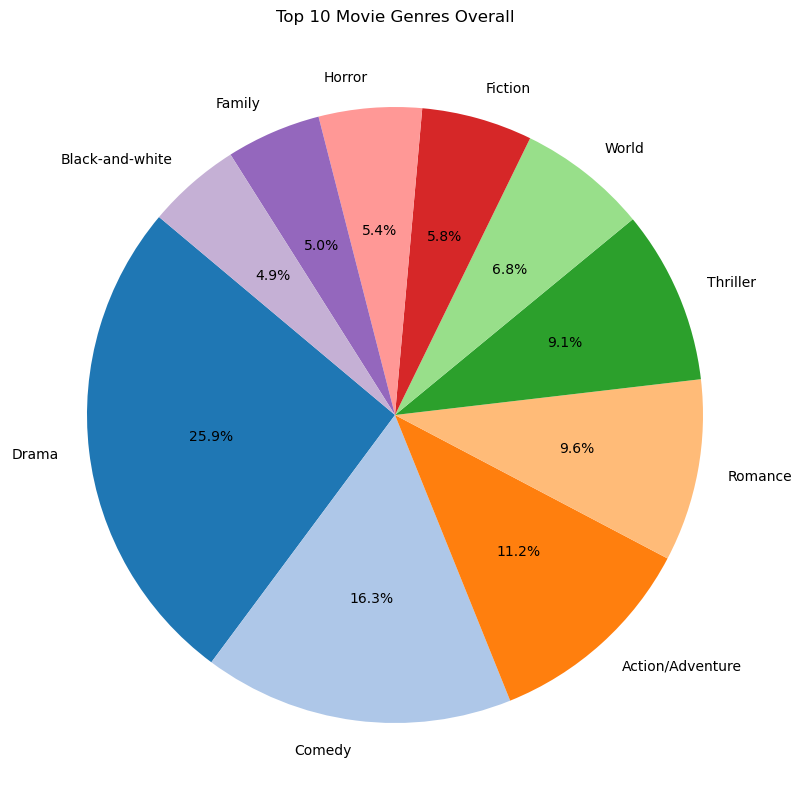

In [7]:
plot_top_genres_overall(10, all_genre_distr)

### Observations

We see that the two prevalent genres are Drama and Comedy, which supports our previous observations.

## Analysis of movies genres throughout the decades by continent

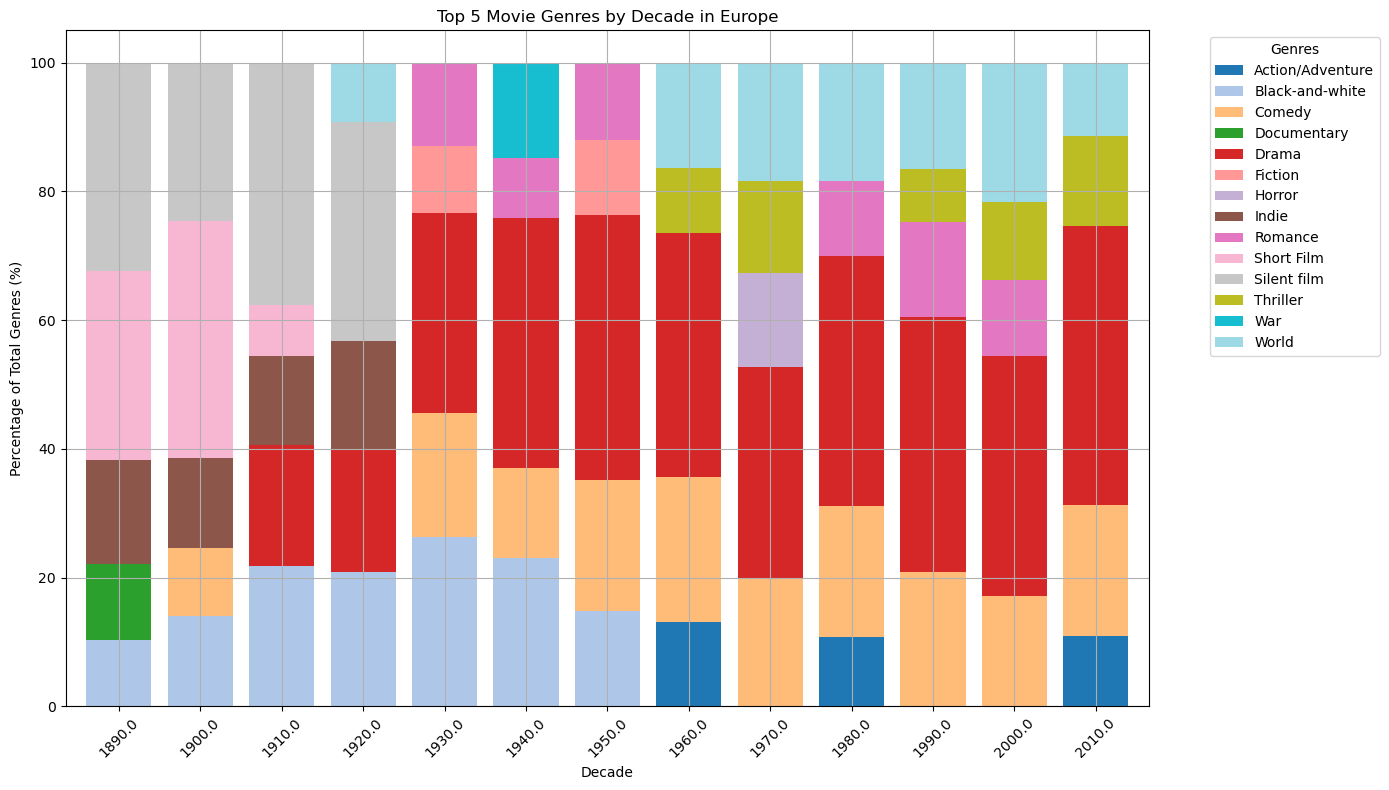

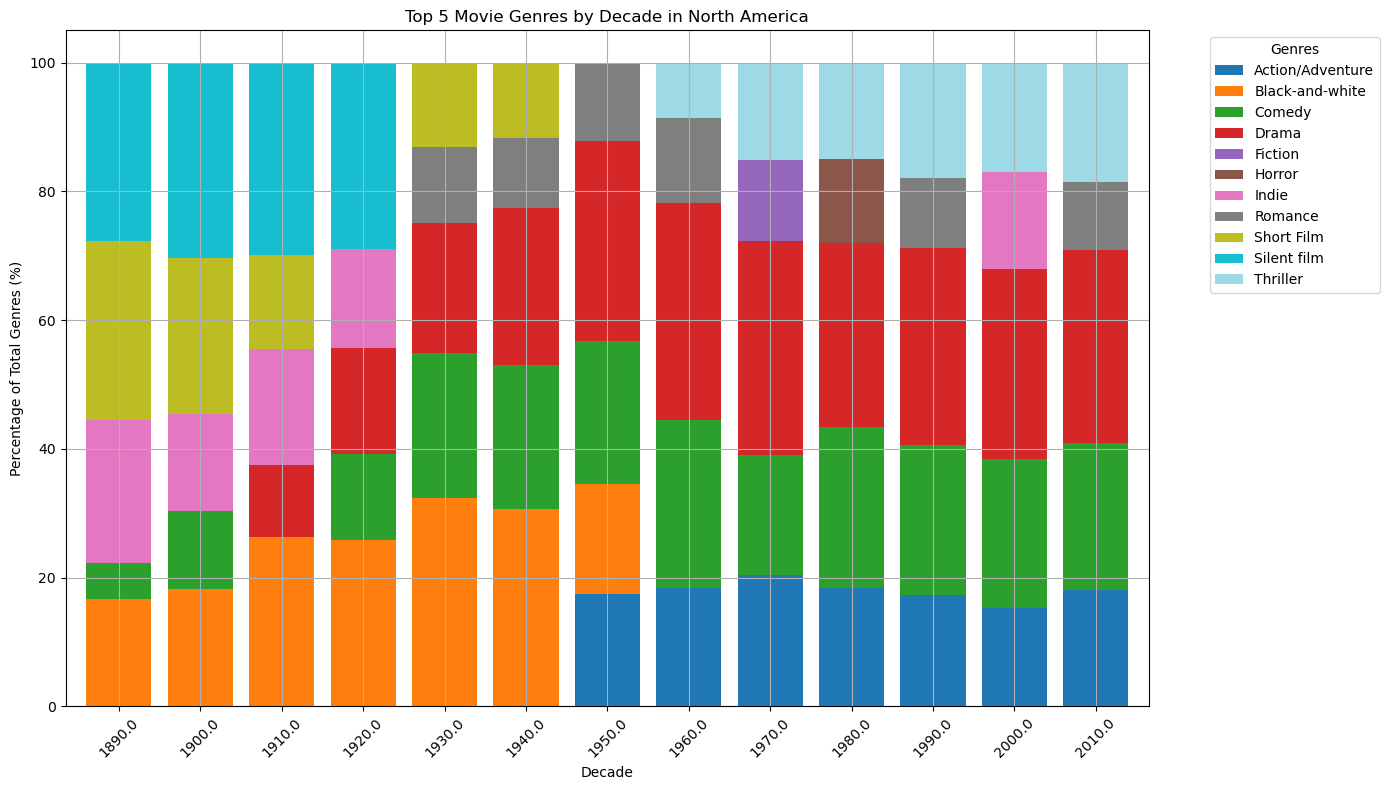

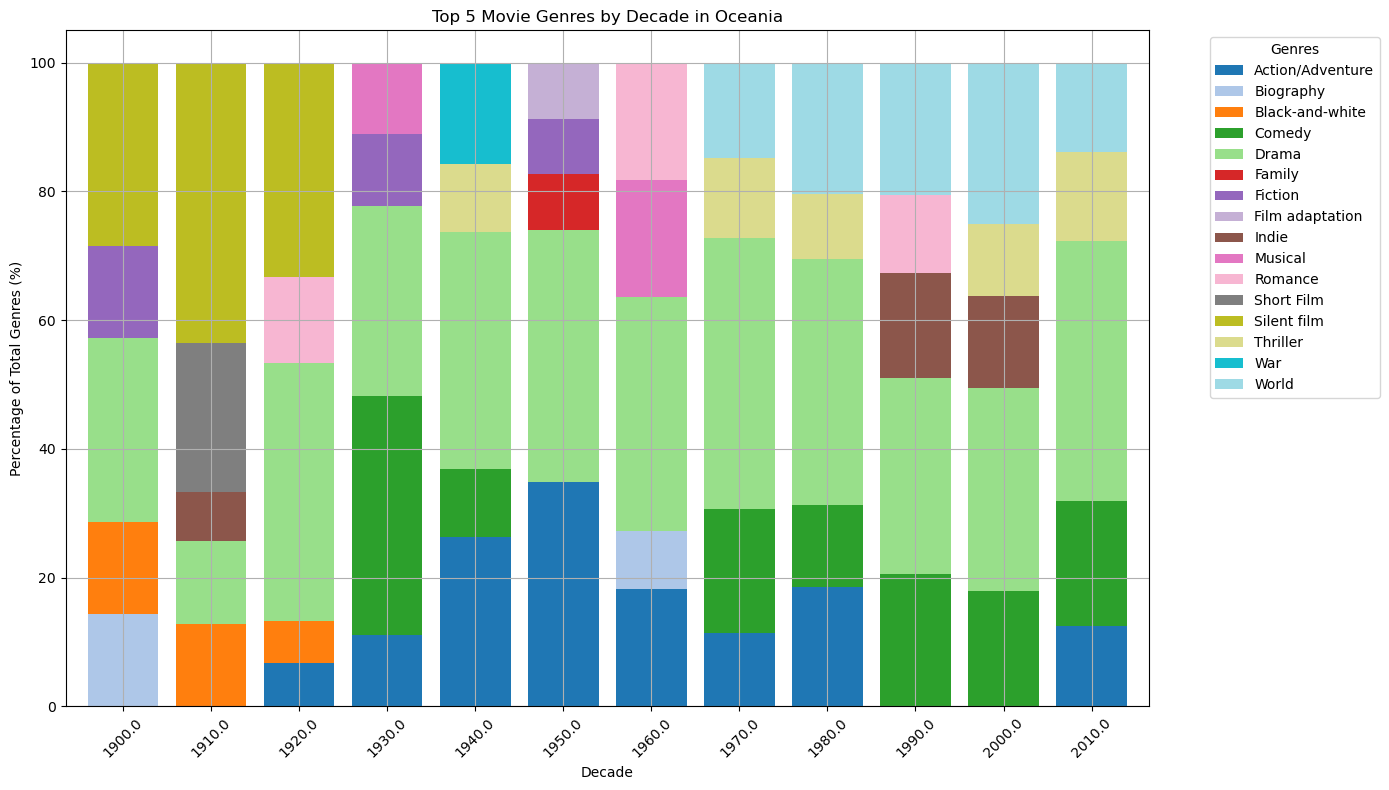

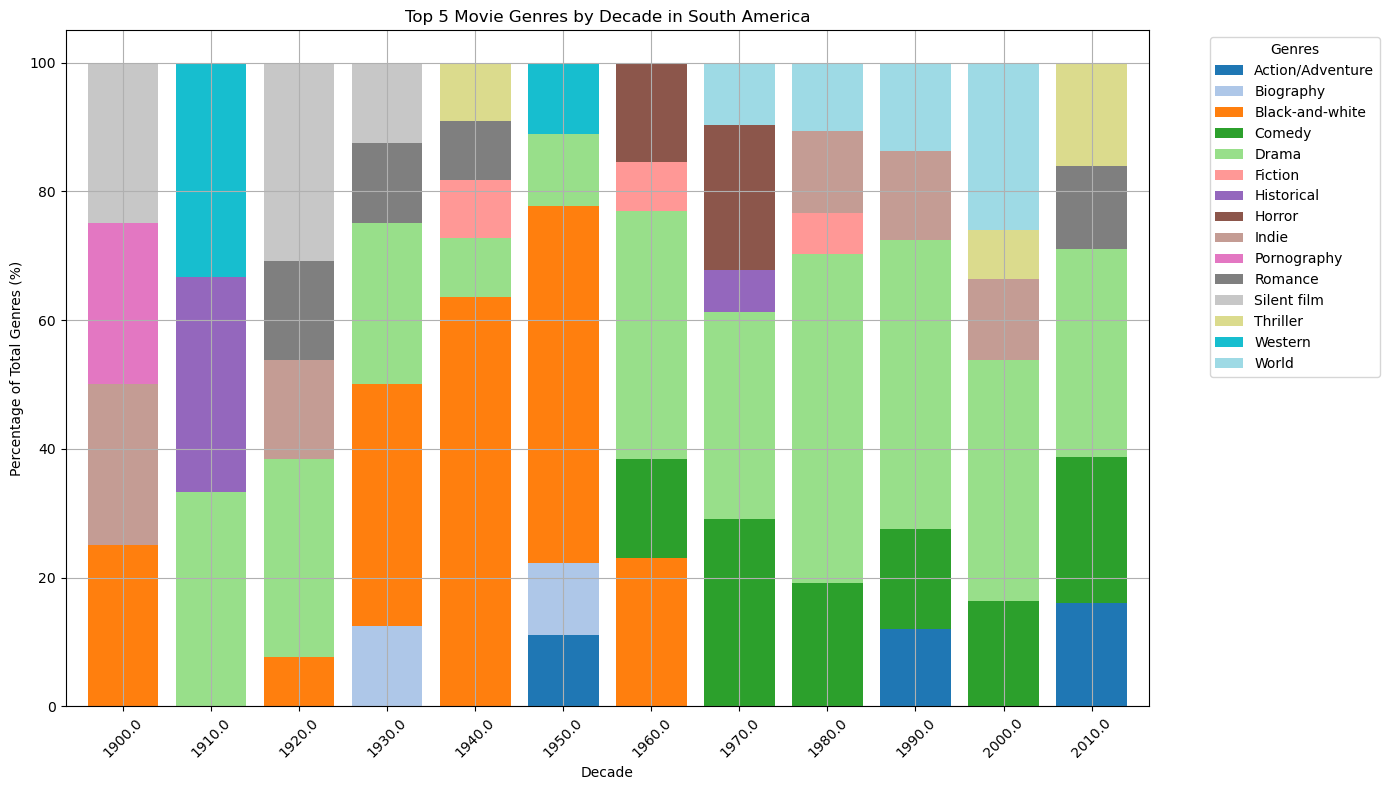

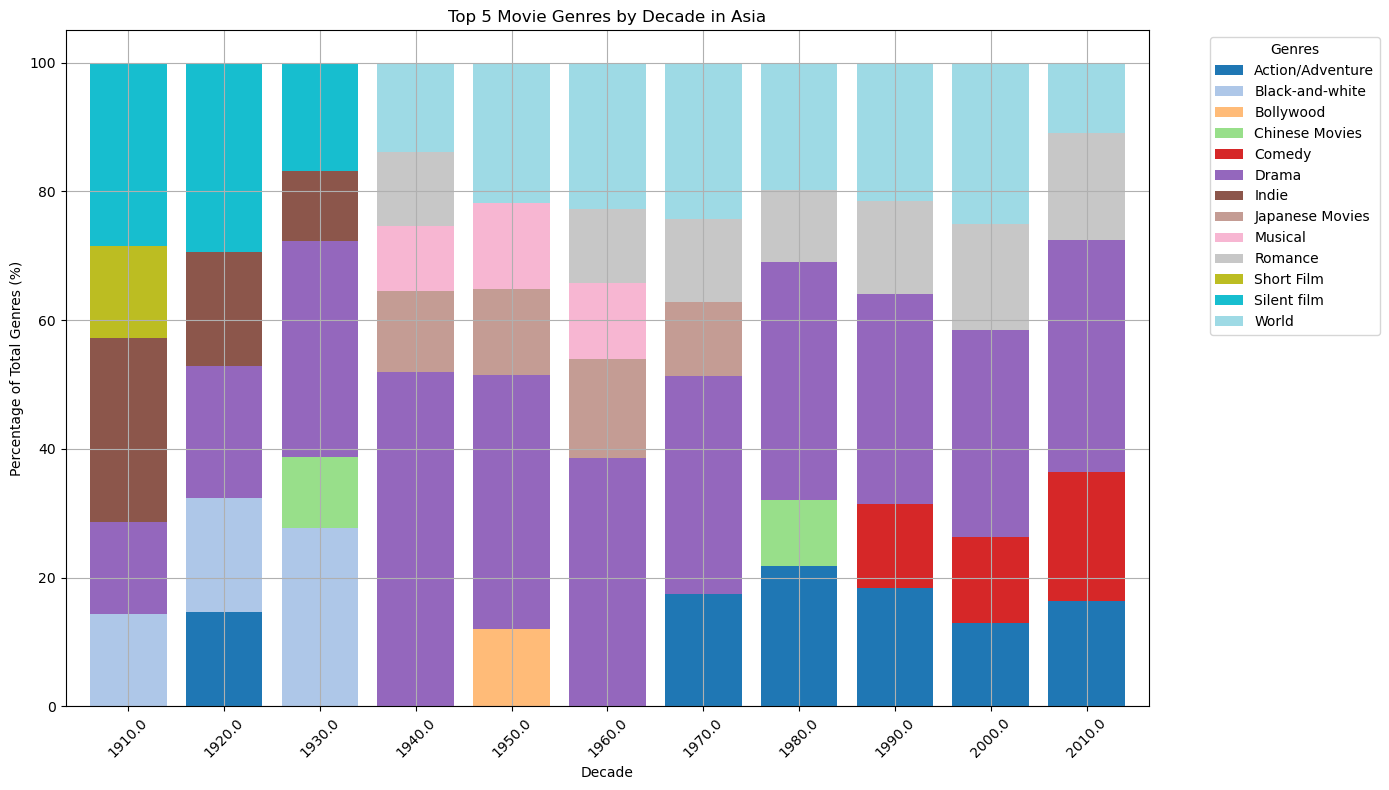

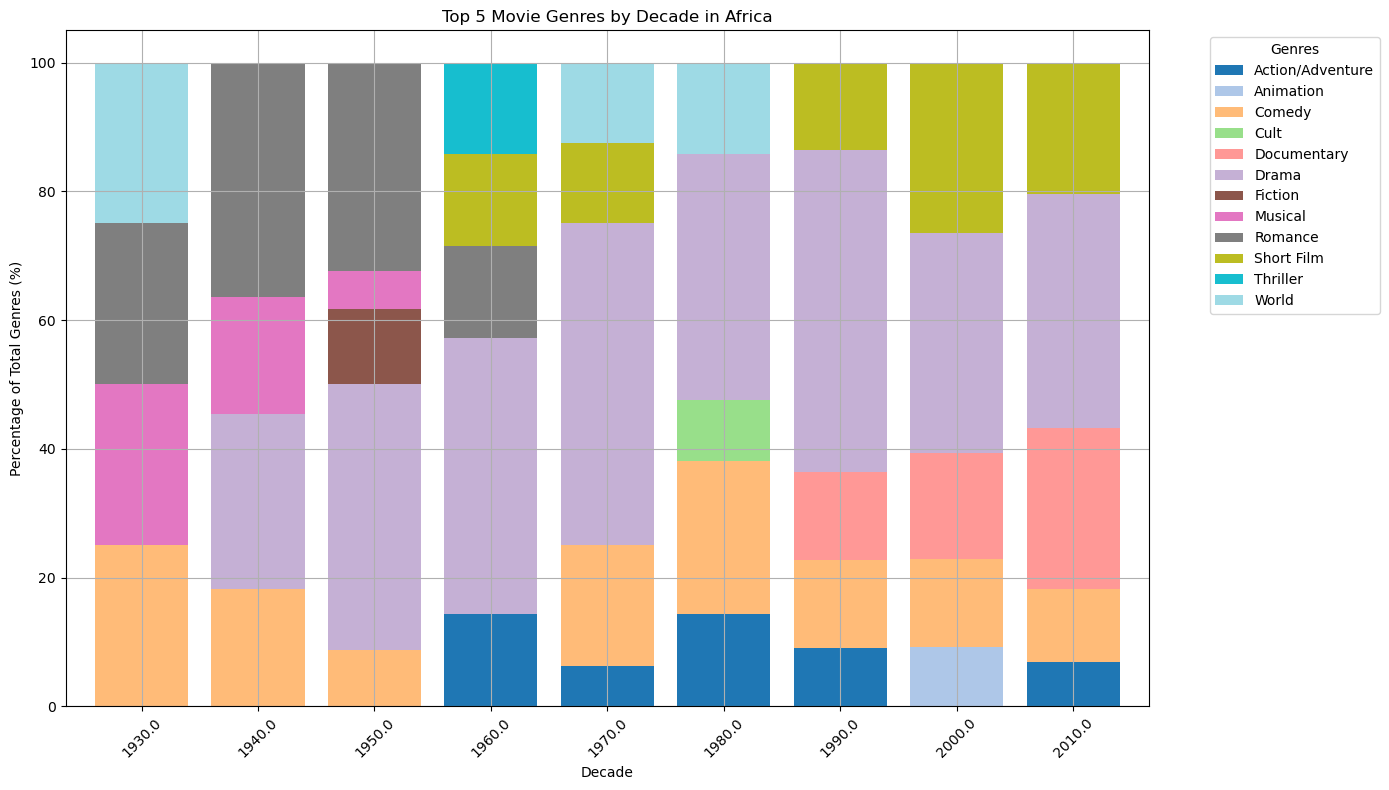

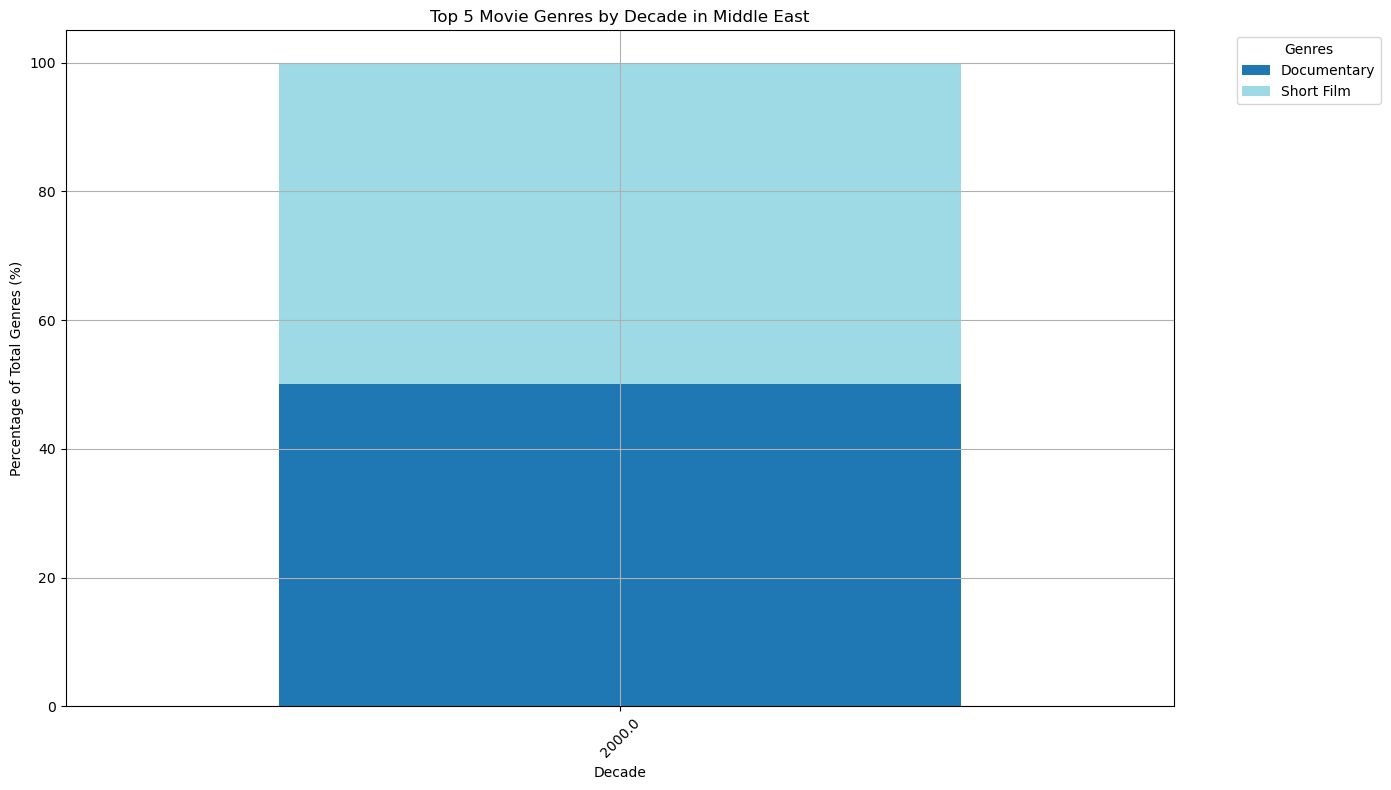

In [8]:
# Top 5 genres in each continent for each decade
plot_top_genres_by_continent(df_expanded)

### Observations

Drama is, as expected, the most prevalent genre across each continent. Surprisingly, the Middle East shows only two genres—Short Film and Documentary—in the 2000s, suggesting a limited representation of Middle Eastern films in the dataset.

The appearance of War as a genre in Europe and Oceania during the 1940s correlates with World War II, reflecting how cinema often mirrors historical events during major conflicts.

In North America, the last seven decades show a stable composition of Action/Adventure, Comedy, and Drama, with a touch of Thriller, suggesting a stable trend in popular genres.

Interestingly, in Africa, the most common genres in the recent decade are Documentary and Short Film. This may show a focus on real-life stories on Africa that may resonate with African Audiences.

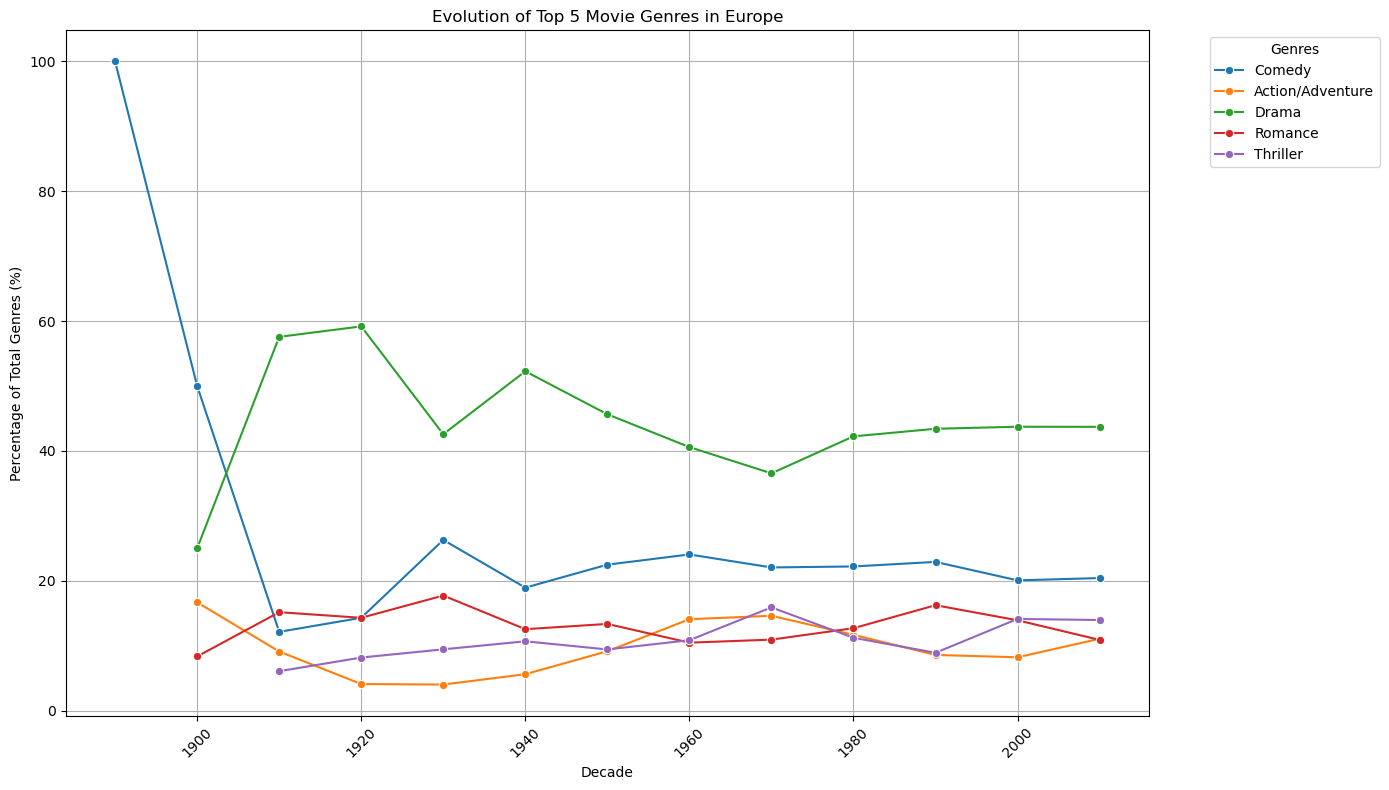

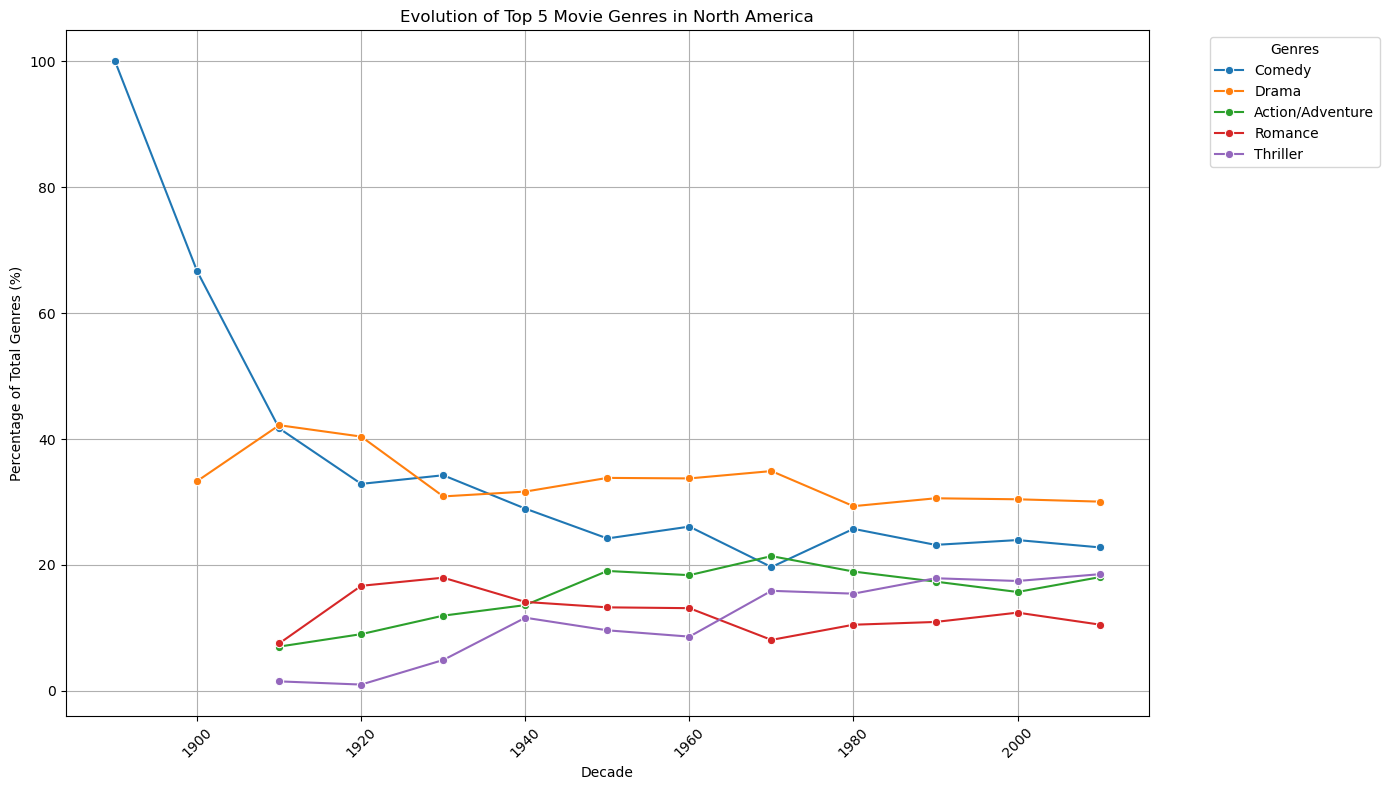

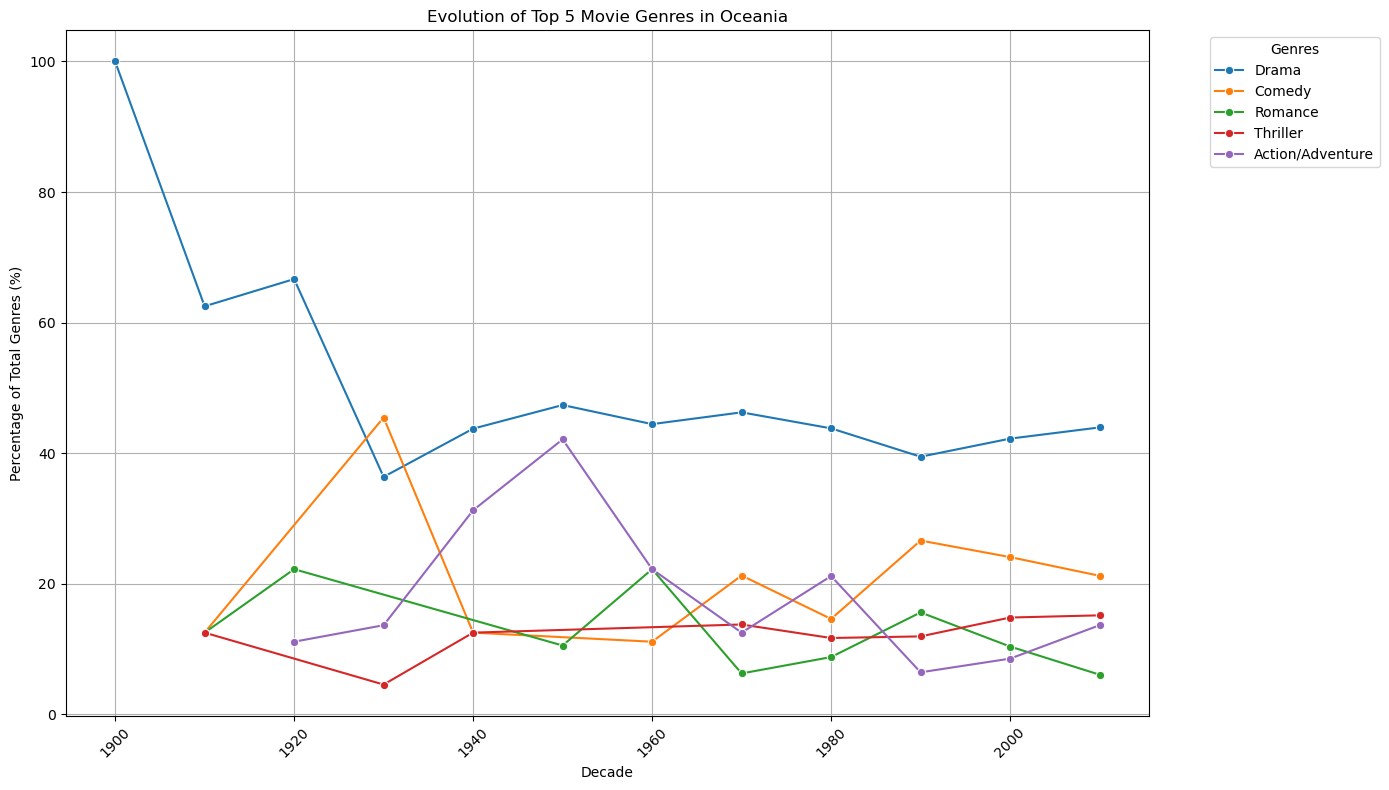

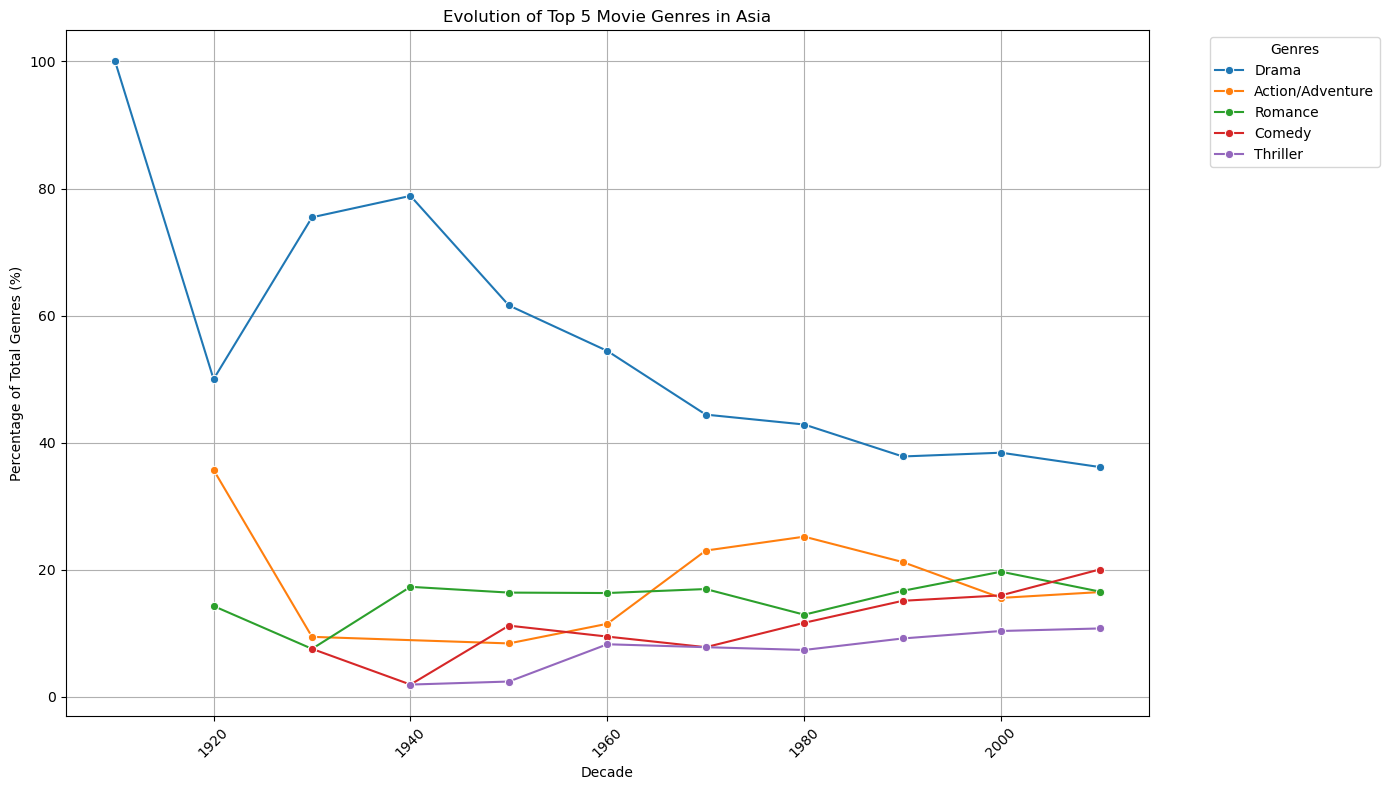

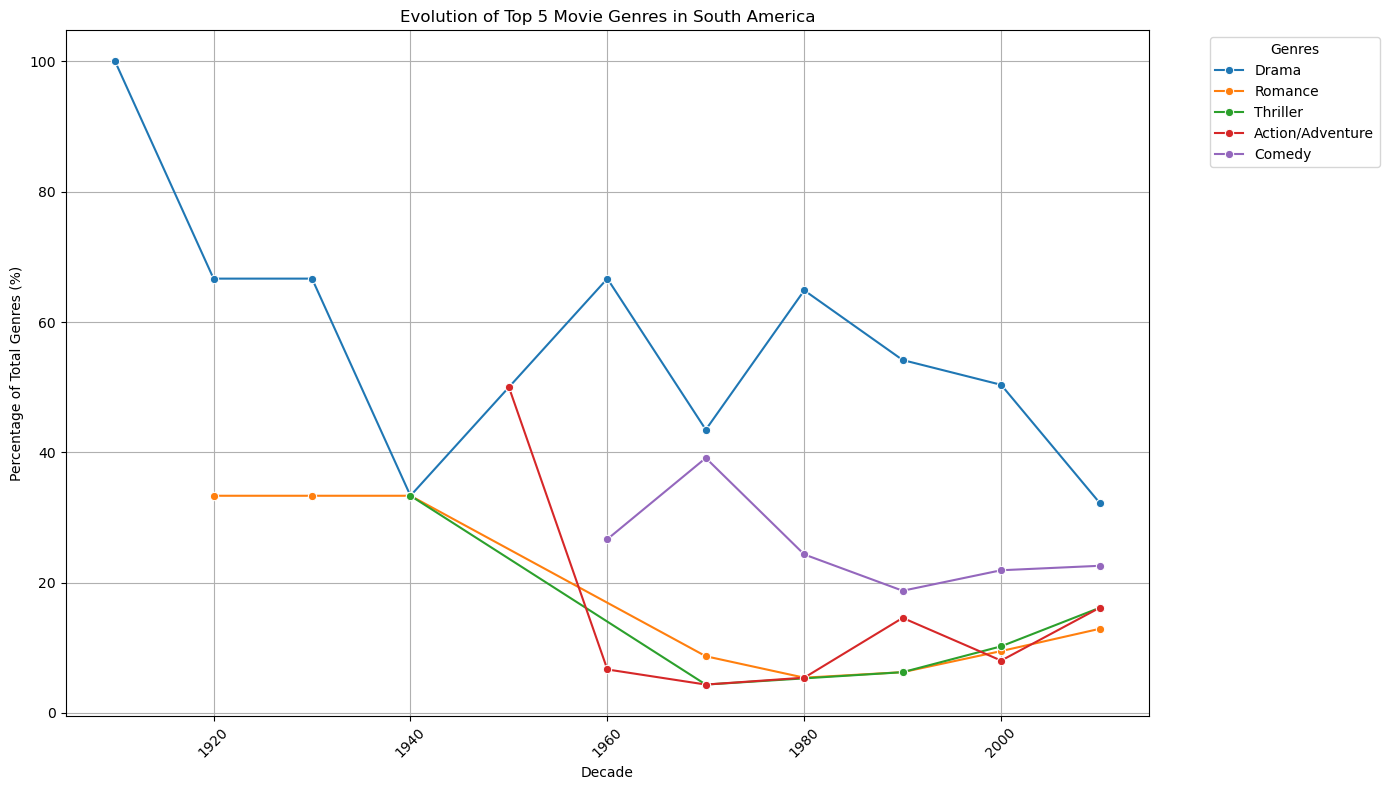

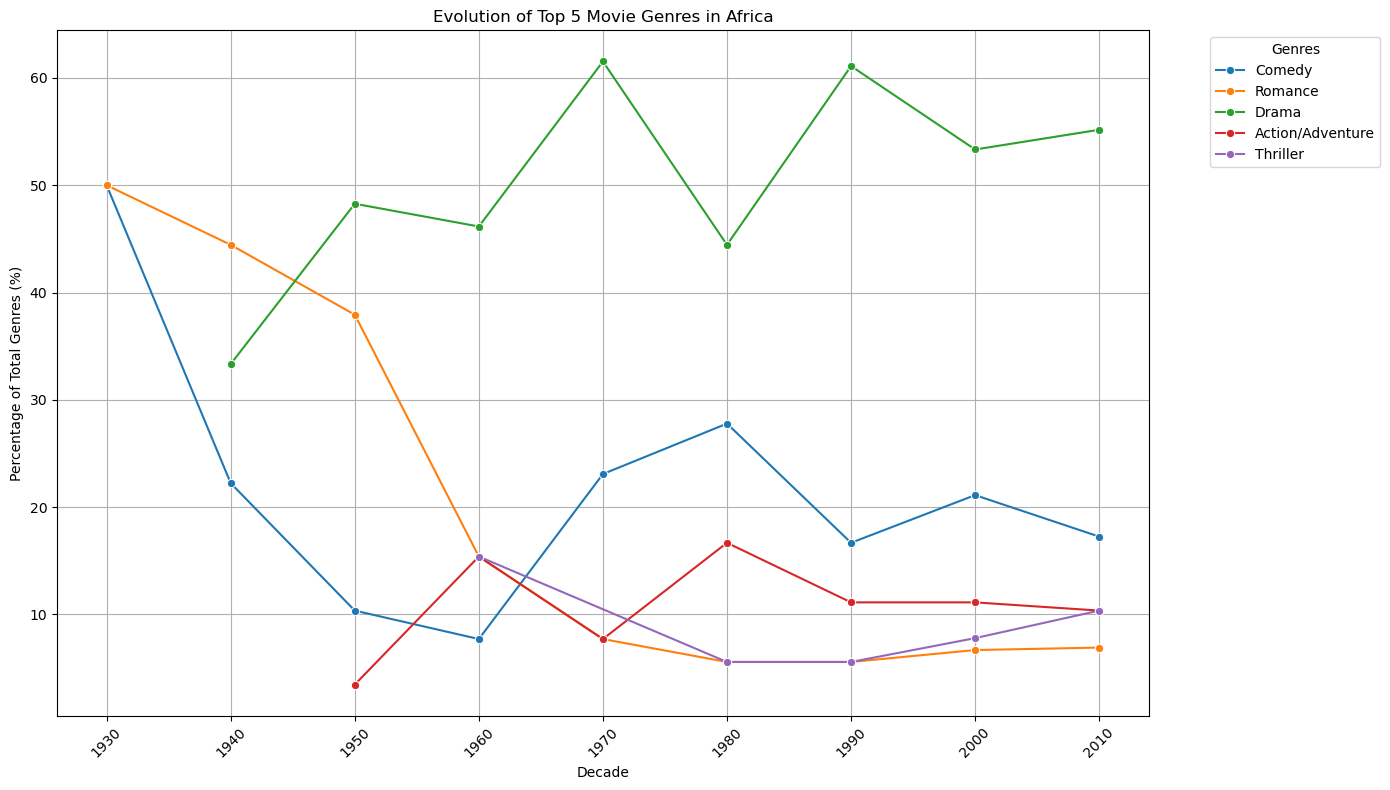

In [9]:
# Evolution of the overall top 5 genres in each continent
plot_top_genres_by_continent_overall(df_expanded)

### Observations

A really interesting first observation is the significant drop in the percentage of the Comedy genre in Africa, North America and Europe, with the biggest one happening in Europe. We observe that a really big part of movies before 1900 are comedies, but only less than 20% are comedies from the 1910 decade.

Among the overall top five genres, Drama stands out as the dominant genre across all continents, with each producing more Drama movies than any other genre. However, the distribution of the overall top five genres varies considerably between continents: the distribution seems more balanced in North America (every genre in the overall top 5 takes between 10% and 30% of the total number of movies of these genres) compared to Africa, which has more than 50% of their movies in the Drama genre, leaving less than half distributed over the four other genres.

Other genres do not seem to have a strong fluctuation in their distribution across the decades. We just note that Africa also has a strong decline in the Romance genre between 1930 and 1960, to produce more Drama movies. A guess that could explain this trend is the historical background of Africa during these decades (colonization, global conflicts...).

## Conclusion on the movies genres analysis

From the observations of the evolution of movies genres throughout the decades, there seems to be a hint that societal themes and topics are related to the movies